# Multiple Regression and Model Validation - Introduction

## Objectives
You will be able to:
* Understand and explain what is covered in this section
* Understand and explain why the section will help you to become a data scientist

## Multiple Linear Regression

- Simple linear regression:  $X \sim Y$ where $X$ is a feature and $Y$ is a target variable.

- Multiple linear regression: $(X_{1}, X_{2}, \cdots, X_{n}) \sim Y$ again $Y$ is the target variable.

## Improving a Baseline Model

- Recall that we used $R^{2}$ score to assess our simple linear model's performance. 

- As # of variables increases in the model $R^{2}$ score always increases. 

- We should find another ways of assessing the performance of the model.


## Dealing with Categorical Variables

- How do we integrate categorical variables into our model?

## Multicollinearity of Features

- What does it mean to have multicollinearity in the data and why is this a problem for multiple linear models?

## Multiple Linear Regression in Statsmodels

After covering a lot of the key theory, you'll then get some hands-on practice in performing multiple linear regressions using the Statsmodels and Scikit-learn libraries.

## Model Fit and Validation

- Does our model good for prediction?

## 1. Review of Simple Linear Regression

In [115]:
import pandas as pd
## Read data from Income2.csv as df_income
## Print the first five rows of the dataframe


## Write your code here

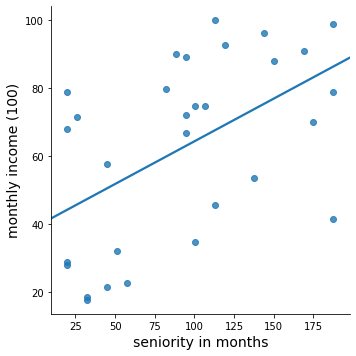

In [113]:
## plot the regression line 
## for seniority and income
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x = 'Seniority', y= 'Income', data = df_income, ci = None);
plt.xlabel('seniority in months', fontsize=14)
plt.ylabel('monthly income (100)', fontsize=14)
plt.show()

In [114]:
## a very quick simple linear model implementation with statsmodel.api
import statsmodels.api as sm

## write your code here


#%load -r 13:19 answers.py

## 2. Adding Extra Features 

- Obviously mothly income depends many other variables:
    - Education level
    - num of hours worked
    - Employement rate
    - Sector
    - etc.
 
In that sense, if we add in years of education as a predictor, then we should update the formula as :

$$  \text{income} = \beta_{0} + \beta_{1} \times \text{years of education} + \beta_{2} \times \text{seniority}$$

Visuallity this corresponds to fitting a plane to a set of numbers in three dimensions:

<img src="images/multiple_reg.png" width="500">

More generally, the linear model is expressed as:

$$ \hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{1} + \cdots + \hat{\beta}_{p} X_{p}$$ 

and as we are fitting the model we are trying to minimize:

$$ \text{Residual Sum of Squares} = f(\hat{\beta}_{0}, \cdots, \hat{\beta}_{p}) =\sum\limits_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}$$


In [ ]:
## Now let's use both Seniority and Education from df_income to 
## predict Income.
## Again use statsmodel.api

## your code is here



In [119]:
# %load -r 2:10 answers.py 
X = df_income[['Education', 'Seniority']].values
y = df_income['Income']
X = sm.add_constant(X)

model = sm.OLS(y, X, hasconst=True)
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.13e-16
Time:                        23:44:10   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0856      5.999     -8.349      0.000     -62.394     -37.777
x1             5.8956      0.357     16.513      0.000       5.163       6.628
x2             0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__How to analyze result__

a) F_statistics and corresponding F-probability tests whether at least one of the features explains the target variable or not. More specifically, null-hypothesis is:

$$ H_{0}: \beta_{1} = \cdots = \beta_{p} = 0 $$

For more on this: Read ISLR p75-77

b) If we find a significant F-score then the next obvious question is which features exactly explains the target variable significantly. More importantly, we would like to answer, which variables we should keep in our final analysis.

For more on this: Read ISLR p78-79

c) To understand, the fit of the model to the problem at hand we will still use $R^{2}$ score.



### 3. Categorical Variables

In [197]:
## Let's import a new dataset
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
# First convert horsepower into a string and then to int
data['horsepower'] = data['horsepower'].astype(str).astype(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [150]:
## Check the types of the columns - use info method from pandas

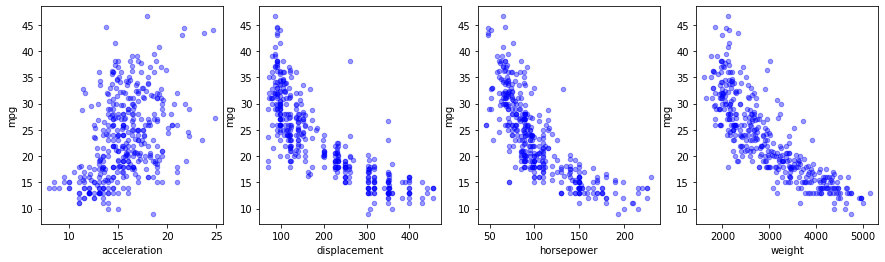

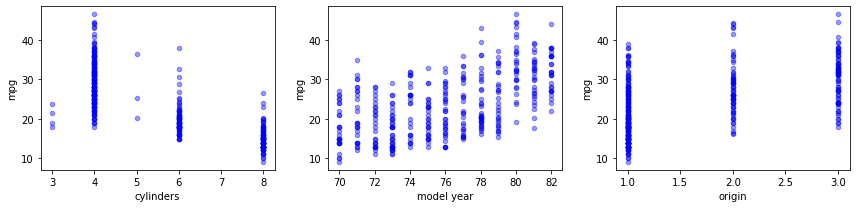

In [151]:
## plotting variables

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')
plt.tight_layout()

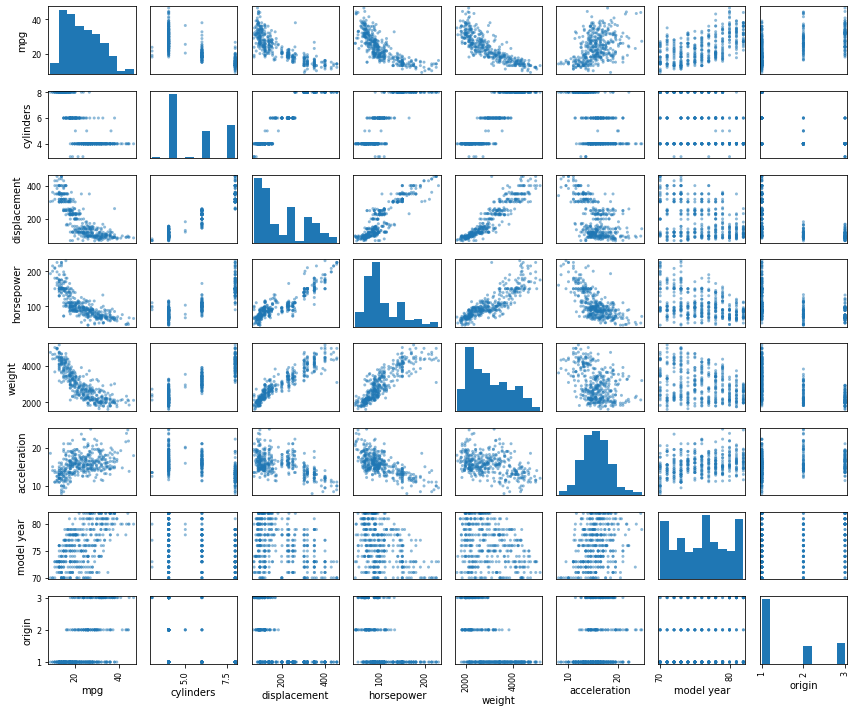

In [174]:
## Another way of plotting variables
pd.plotting.scatter_matrix(data, figsize= (12,10))
plt.tight_layout()

In [153]:
## Another method to check categorical variables
data.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [173]:
## let's drop the unnecessary columns

## and add categories from cylinder and origin as new columns
## Hint: search get_dummies
## be sure that you have a referans category for each column.
## Hint: check the documentation of get_dummy

In [ ]:
%load -r 20:28 answers.py